In [4]:
import xarray as xr # type: ignore
import cftime # type: ignore
import os
import pandas as pd # type: ignore

import matplotlib.pyplot as plt # type: ignore

from datetime import datetime
import seaborn as sns # type: ignore

In [2]:
file_path = "data2/*.nc4"
ds = xr.open_mfdataset(file_path, decode_times=False, combine='nested', concat_dim='time', chunks={})
output_filename = 'other_data.nc'
ds.to_netcdf(output_filename)

c:\Users\DELL\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [76]:
da = xr.open_dataset('other_data.nc')
Kumasi = da.sel(lat=6.72,lon=-1.6, method='nearest')
annual_totals = Kumasi[['Wind_f_inst','Tair_f_inst','Qair_f_inst']].groupby('time.year').mean('time')
monthly_totals = Kumasi[['Wind_f_inst','Tair_f_inst','Qair_f_inst']].groupby('time.month').mean('time')



In [77]:
monthly_totals

<xarray.Dataset>
Dimensions:      (month: 12)
Coordinates:
    lon          float32 -1.5
    lat          float32 6.5
  * month        (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    Wind_f_inst  (month) float32 1.152 1.321 1.436 1.423 ... 1.099 1.099 1.061
    Tair_f_inst  (month) float32 300.2 301.2 301.0 300.7 ... 298.2 299.1 299.7
    Qair_f_inst  (month) float32 0.01215 0.01465 0.01664 ... 0.01649 0.01319
Attributes: (12/20)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    Conventions:            CF-1.6
    history:                created on date: 2019-09-27T23:01:53.919
    source:                 Noah_v3.6 forced with GDAS-AGRMET-GPCPv13rA1
    institution:            NASA GSFC
    missing_value:          -9999.0
    ...                     ...
    SOUTH_WEST_CORNER_LAT:  -59.5
    SOUTH_WEST_CORNER_LON:  -179.5
    DX:                     1.0
    DY:                     1.0
    history_L34RS:          'Created by L34RS v1.4.4 @ NASA GES DISC on May 2...
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [91]:
import numpy as np # type: ignore

def subset_periods(df, event_months, before_months, after_months):
    periods = []
    for i, event_year in enumerate(event_months):
        # Ensure that the period doesn't go beyond the bounds of the data
        before_start = max(event_year - before_months[i], df['month'].min())
        after_end = min(event_year + after_months[i], df['month'].max())
        period = df.sel(month=slice(before_start, after_end))
        periods.append(period)
    return periods

# Assuming you have identified high impact rainfall event years and defined before_years and after_years accordingly
event_months = [6, 10]
before_months = [5, 9]  # For example, 2 years before for 2022 event and 1 year before for 2023 event
after_months = [7, 2]   # For example, 1 year after for 2022 event and 2 years after for 2023 event
periods = subset_periods(monthly_totals, event_months, before_months, after_months)
periods

[<xarray.Dataset>
 Dimensions:      (month: 12)
 Coordinates:
     lon          float32 -1.5
     lat          float32 6.5
   * month        (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
 Data variables:
     Wind_f_inst  (month) float32 1.152 1.321 1.436 1.423 ... 1.099 1.099 1.061
     Tair_f_inst  (month) float32 300.2 301.2 301.0 300.7 ... 298.2 299.1 299.7
     Qair_f_inst  (month) float32 0.01215 0.01465 0.01664 ... 0.01649 0.01319
 Attributes: (12/20)
     CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
     Conventions:            CF-1.6
     history:                created on date: 2019-09-27T23:01:53.919
     source:                 Noah_v3.6 forced with GDAS-AGRMET-GPCPv13rA1
     institution:            NASA GSFC
     missing_value:          -9999.0
     ...                     ...
     SOUTH_WEST_CORNER_LAT:  -59.5
     SOUTH_WEST_CORNER_LON:  -179.5
     DX:                     1.0
     DY:                     1.0
     history_L34RS:          'Crea

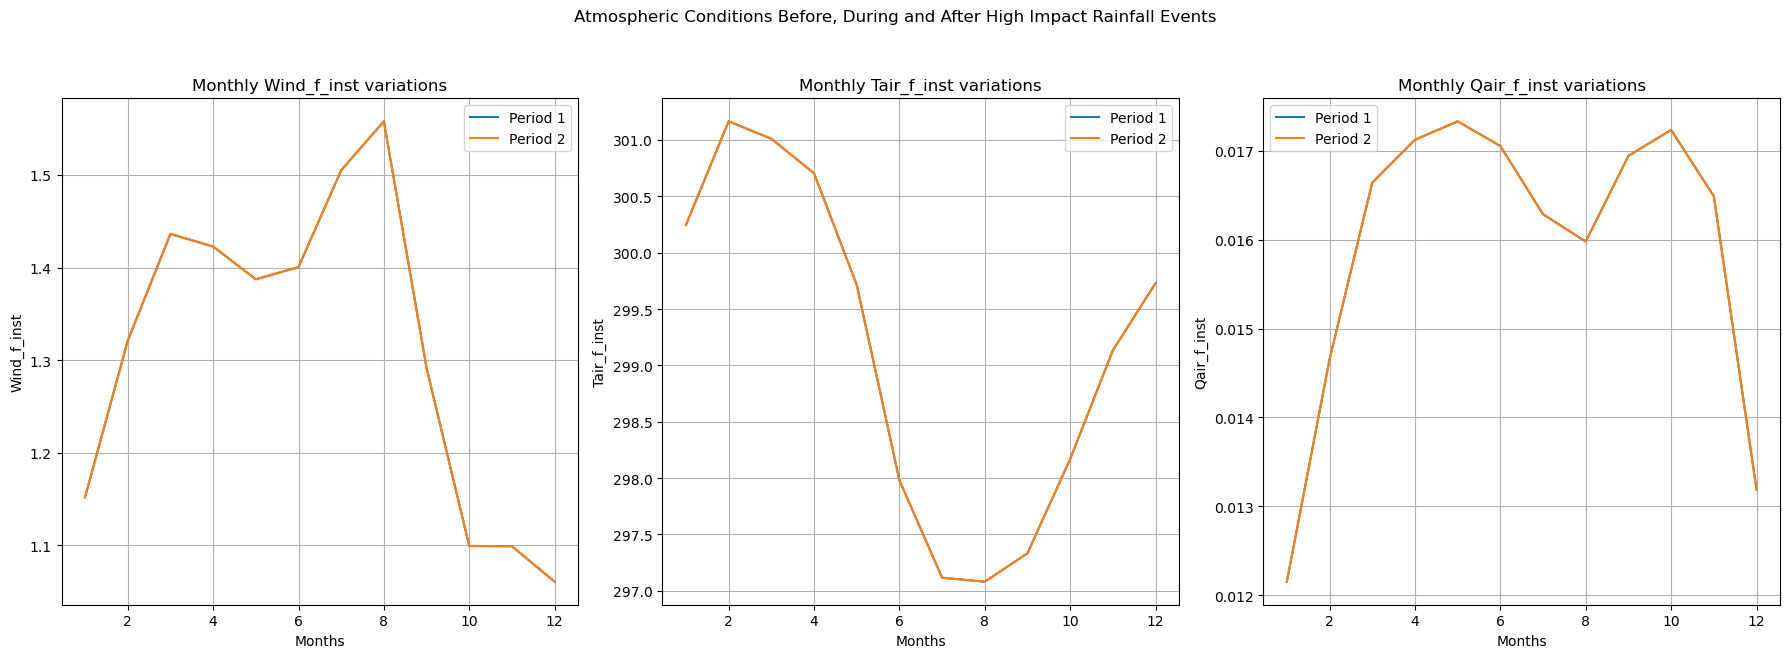

In [92]:
summary_stats = []
for period in periods:
    summary_stats.append(period)

# Step 3: Visualization
# Create time series plots for each variable
variables = ['Wind_f_inst', 'Tair_f_inst', 'Qair_f_inst']
fig, axs = plt.subplots(1, len(variables), figsize=(6 * len(variables), 6))

for i, variable in enumerate(variables):
    axs[i].set_title(f'Monthly {variable} variations')
    axs[i].set_xlabel('Months')
    axs[i].set_ylabel(variable)
    for j, period in enumerate(periods):
        axs[i].plot(period['month'], period[variable], label=f'Period {j+1}')
    axs[i].legend()
    axs[i].grid(True)

plt.tight_layout()
plt.suptitle("Atmospheric Conditions Before, During and After High Impact Rainfall Events", y=1.09)
plt.show()

In [86]:
import numpy as np # type: ignore

def subset_periods(df, event_years, before_years, after_years):
    periods = []
    for i, event_year in enumerate(event_years):
        # Ensure that the period doesn't go beyond the bounds of the data
        before_start = max(event_year - before_years[i], df['year'].min())
        after_end = min(event_year + after_years[i], df['year'].max())
        period = df.sel(year=slice(before_start, after_end))
        periods.append(period)
    return periods

# Assuming you have identified high impact rainfall event years and defined before_years and after_years accordingly
event_years = [2022, 2023]
before_years = [12, 13]  # For example, 2 years before for 2022 event and 1 year before for 2023 event
after_years = [1, 1]   # For example, 1 year after for 2022 event and 2 years after for 2023 event
periods = subset_periods(annual_totals, event_years, before_years, after_years)
periods


[<xarray.Dataset>
 Dimensions:      (year: 14)
 Coordinates:
     lon          float32 -1.5
     lat          float32 6.5
   * year         (year) int64 2010 2011 2012 2013 2014 ... 2020 2021 2022 2023
 Data variables:
     Wind_f_inst  (year) float32 1.393 1.353 1.374 1.393 ... 1.237 1.211 1.209
     Tair_f_inst  (year) float32 299.1 299.1 299.1 299.2 ... 299.1 298.7 299.0
     Qair_f_inst  (year) float32 0.01689 0.01609 0.01595 ... 0.01501 0.01565
 Attributes: (12/20)
     CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
     Conventions:            CF-1.6
     history:                created on date: 2019-09-27T23:01:53.919
     source:                 Noah_v3.6 forced with GDAS-AGRMET-GPCPv13rA1
     institution:            NASA GSFC
     missing_value:          -9999.0
     ...                     ...
     SOUTH_WEST_CORNER_LAT:  -59.5
     SOUTH_WEST_CORNER_LON:  -179.5
     DX:                     1.0
     DY:                     1.0
     history_L34R

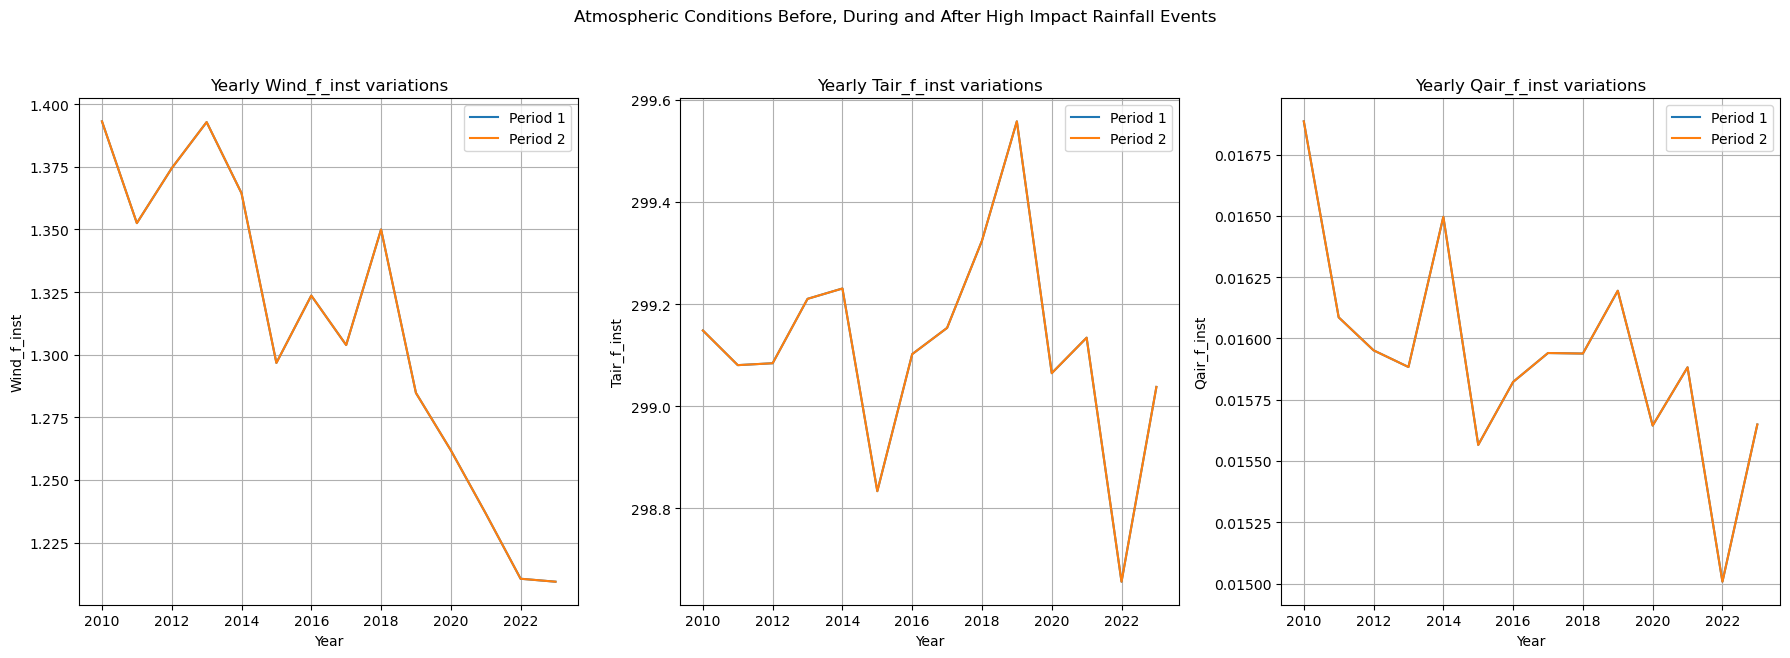

In [87]:
summary_stats = []
for period in periods:
    summary_stats.append(period)

# Step 3: Visualization
# Create time series plots for each variable
variables = ['Wind_f_inst', 'Tair_f_inst', 'Qair_f_inst']
fig, axs = plt.subplots(1, len(variables), figsize=(6 * len(variables), 6))

for i, variable in enumerate(variables):
    axs[i].set_title(f'Yearly {variable} variations')
    axs[i].set_xlabel('Year')
    axs[i].set_ylabel(variable)
    for j, period in enumerate(periods):
        axs[i].plot(period['year'], period[variable], label=f'Period {j+1}')
    axs[i].legend()
    axs[i].grid(True)

plt.tight_layout()
plt.suptitle("Atmospheric Conditions Before, During and After High Impact Rainfall Events", y=1.09)
plt.show()